# Data handling in R 
Preparing and cleaning data is an important step before actual analyses are done. Wrong data can adversely affect your outcome. This preparation can be more time consuming then doing the actual analyses. This workshop provides an introduction to handling raw data with R. This allows you to go from raw to clean data in a reproducible way. In this workshop we will handle some basic functionality. 

## What is R?
R is an open source language and environment for data handling, statistical computing and graphics. R can easily be extended by importing 'packages' for various functionalities or statistical techniques. Also self-made functions can be defined. This makes R a very versatile option. It can also handle larger amounts of data than, for instance, Excel.

## Step 1. Import and check raw data
To import data, always first set the path to where the data is. Then import the raw data into the R environment. For each data format (i.e. .txt, .csv) a different import function() is required. Any function() comes with different options for parameters, in this case on how exactly you want to import the data. The data will mostly be imported into a dataframe object. This can hold different types of data; all columns can be of a different type. This is in contrast to a matrix, or a vector, which can hold only one data type.

The first thing you do after import is to check the data to see what you'll be working with. 

> As a good practice, first assess your dataframe. Use head(), str(), summary()

In [1]:
# read.delim reads tab-delimited text files.
# with '<-' we assign the data to a variable name, so you can refer to the data. 
# we read in two files here that are related, we'll work with these throughout this Jupyter notebook.

PD1 <- read.delim("PatientDATA1.txt", stringsAsFactors = FALSE )
PD2 <- read.delim("PatientDATA2.txt", stringsAsFactors = FALSE )

# Question: What happens if you do not assign the data to a variable name?

# 'head' gives you the first 6 rows of the object.
head(PD1)
head(PD2)


,PATNO,GENDER,HR,SBP_DBP,AE
1,3456,Male,40,80_120,8
2,8765,Female,56,120_190,1
3,987,Male,77,110_180,8
4,7372,m,56,134_154,1
5,8742,F,89,88_108,1
6,4321,feminin,4,103_190,1


,PATNO,DX,VISIT
1,541,12,2-3-2016
2,8765,34,9-8-2015
3,7654,34,17-4-2016
4,3456,39,23-4-2016
5,987,12,11-12-2015
6,452,39,04-12-2015


In [2]:
####### Assignment:

# You've seen what head() does.
# With str() and summary() you can already have a peak at how 'clean' or 'faulty' your data is.
# Now check out PatientDATA1 and PatientDATA2 more closely here with str() and summary() and dim()



## Step 2. Integrate with other data
Different sets on the same subjects can be integrated, always on the basis of a common identifier. The 'merge()' function is very handy. It enabels you to 

* keep only the data on common records/rows (all=FALSE) 
* all records/rows of one or the other file (all.x=TRUE, all.y=TRUE) 
* keep al records/rows of both files (all=TRUE) 

> As a good practice, do not overwrite the data objects that you've read in. Assign a new name to your working objects.

In [3]:
####### Assignment:
# For our dataset, we merge on the common identier 'PATNO'. We keep only the patients for which there is data in both files.
# what 'all' option do you need to keep only the common patients between the files?

#Pdata<-merge(PD1,PD2,by="PATNO",all..... ) 

Pdata<-merge(PD1,PD2,by="PATNO",all=FALSE ) 

# The file is small, in this case we can view it in total. This is done by just writing 'Pdata'.
Pdata

# Question: How many rows and columns did the original files have? How many does the new integrated file have? 

,PATNO,GENDER,HR,SBP_DBP,AE,DX,VISIT
1,452,Mal,91,96_180,8,39,04-12-2015
2,987,Male,77,110_180,8,12,11-12-2015
3,3456,Male,40,80_120,8,39,23-4-2016
4,4321,feminin,4,103_190,1,12,7-2-2016
5,7372,m,56,134_154,1,12,11-8-2016
6,8742,F,89,88_108,1,12,8-1-2016
7,8765,Female,56,120_190,1,34,9-8-2015


## Step 3. Change the data classes to appropriate ones
All data belong to one or another class. 
Each class has its own possibilities for analyses, and associated permitted values (value domain). This will help check if the data is correct. For instance, 'two' is not a permitted value for a numeric class type, '2' is. Similarly, you cannot (and should not) calculate with Factors. So having assigned the correct class prevents mistakes.

Common classes of data that are supported in R are: 
* character (for text)
* factor (for categorical)
* numeric and integer (for numerical)
* date (for dates) 
* logical (either true or false) 

Convert each data column to the correct class. If a numeric is not intended for calculations such as the patient number, it should be a factor. For the date, we want to convert this into the international standard (year, month, day). These are indicated as %y (for short notation i.e. '16') or %Y (for long notation i.e. '2016'), %m, %d.
* PATNO = Factor (patient ID)
* GENDER = Factor (male or female)  
* HR = Numeric (heart rate)
* SBP_DBP = Numeric (systolic_diastolic blood pressure)
* AE = Factor (got medicine yes/no)
* DX = Factor (diagnosis number) 
* VISIT = date (the date of the visit)

> As a good practice, adjust the columns in a dataframe to the correct class. Postpone this for some that you want to clean. i.e. Factors are easily manipulated as a string.

In [4]:
dim(Pdata)
str(Pdata)


# Dates formats are indicated as %y (short i.e. '09' or '9') or %Y (long i.e. '2009'), %m (month as '04' or ; '4'), %d (day as '06' or '6').
# check out: how is the conversion of visit to a date with as.date()
as.Date(Pdata$VISIT,format="%d-%m-%Y")

# now really change the datafile
Pdata$VISIT<-as.Date(Pdata$VISIT,format="%d-%m-%Y")

# the number of days between the visits can be calculated. Only possible now, with date format!
diff(Pdata$VISIT)

Pdata$PATNO <-as.factor(Pdata$PATNO) 
Pdata$AE <-as.factor(Pdata$AE)
str(Pdata)

[1] 7 7

'data.frame':	7 obs. of  7 variables:
 $ PATNO  : int  452 987 3456 4321 7372 8742 8765
 $ GENDER : chr  "Mal" "Male" "Male" "feminin" ...
 $ HR     : int  91 77 40 4 56 89 56
 $ SBP_DBP: chr  "96_180" "110_180" "80_120" "103_190" ...
 $ AE     : int  8 8 8 1 1 1 1
 $ DX     : int  39 12 39 12 12 12 34
 $ VISIT  : chr  "04-12-2015" "11-12-2015" "23-4-2016" "7-2-2016" ...


[1] "2015-12-04" "2015-12-11" "2016-04-23" "2016-02-07" "2016-08-11"
[6] "2016-01-08" "2015-08-09"

Time differences in days
[1]    7  134  -76  186 -216 -152

'data.frame':	7 obs. of  7 variables:
 $ PATNO  : Factor w/ 7 levels "452","987","3456",..: 1 2 3 4 5 6 7
 $ GENDER : chr  "Mal" "Male" "Male" "feminin" ...
 $ HR     : int  91 77 40 4 56 89 56
 $ SBP_DBP: chr  "96_180" "110_180" "80_120" "103_190" ...
 $ AE     : Factor w/ 2 levels "1","8": 2 2 2 1 1 1 1
 $ DX     : int  39 12 39 12 12 12 34
 $ VISIT  : Date, format: "2015-12-04" "2015-12-11" ...


In [5]:
####### Assignment:
# are all columns converted to a correct data type? Check the str() outcome above.
# change the DX column to the right type.

Pdata$DX <-as.factor(Pdata$DX) 

## Step 4. Make values consistent and within correct range

How to address separate rows, columns, and values in a dataframe:

* Pdata[rownumber,columnnumber] adresses a specific cell in the dataframe  
* Pdata[rownumber, ] adresses a row 
* Pdata[ ,columnnumber] adresses a column 
* Pdata'$'label also adresses a column, by name.
* Pdata$label[instancenumber] adresses the value in a list 

**ALIGN VOCABULARY.** We take GENDER for an example. For GENDER, we see some inconsistencies. We know in reality (for the larger part!) we have oly two sorts of gender: Male and Female. Spelling mistakes or abbreviations can lead to a number of names for these. We will calculate the difference of all varieties in the GENDER column to our default: Male and Female. This difference is calculated based on length, faulty characters, capital/lower case differences. For every instance of the GENDER column, we choose the nearest option (Male or Female). Checking every instance as such is a realistic option as there presumably will only be a limited number of instances by possible notations/mistakes.


In [6]:
# Check what GENDER column looks like.
Pdata$GENDER

# Set a character vector of example names
codes<-c("Male","Female")
codes

D <- adist(Pdata$GENDER, codes)
colnames(D) <- codes
rownames(D) <- Pdata$GENDER

# distances for all records
D
# On second thought, show only those varieties that are unique (this is efficient; there is less to evaluate)
# the exclamation mark means 'not'.
D[!duplicated(rownames(D)),]

####### Assignment: 

# Does the code work or does it contain errors? Check if all varieties are nearest to their intended name.



[1] "Mal"     "Male"    "Male"    "feminin" "m"       "F"       "Female"

[1] "Male"   "Female"

,Male,Female
Mal,1,4
Male,0,3
Male,0,3
feminin,7,5
m,4,5
F,4,5
Female,3,0


,Male,Female
Mal,1,4
Male,0,3
feminin,7,5
m,4,5
F,4,5
Female,3,0


In [7]:
# This works for the most part, however with 'F' there is a mistake. 
# This is because there is a larger difference in word length with 'Female' than with 'Male'.
# As a solution: Get all words that contain 'F' and replace these by 'Female'. Repeat the distance calculation.

Frepl<-grep("F",Pdata$GENDER)#<-"Female" # do the same for female!
Pdata$GENDER[Frepl]<-"Female"

D <- adist(Pdata$GENDER, codes)
colnames(D) <- codes
rownames(D) <- Pdata$GENDER

# distances for every variety
D[!duplicated(rownames(D)),]

i <- apply(D, 1, which.min)

# Change the column entries with the nearest codename. 
Pdata$GENDER<-codes[as.numeric(i)]

Pdata

,Male,Female
Mal,1,4
Male,0,3
feminin,7,5
m,4,5
Female,3,0


,PATNO,GENDER,HR,SBP_DBP,AE,DX,VISIT
1,452,Male,91,96_180,8,39,2015-12-04
2,987,Male,77,110_180,8,12,2015-12-11
3,3456,Male,40,80_120,8,39,2016-04-23
4,4321,Female,4,103_190,1,12,2016-02-07
5,7372,Male,56,134_154,1,12,2016-08-11
6,8742,Female,89,88_108,1,12,2016-01-08
7,8765,Female,56,120_190,1,34,2015-08-09


**CHECK VALUE RANGE.** Also, we check if the values of all columns are within range and if not, we replace these with NA (not available) if we are not sure what the correct value is. Most operations in R can handle NA without crashing. na.omit() will let you remove all incomplete entries.

In [8]:
# Heart rate should be anywhere from 40 to 100. 
mean(Pdata$HR)

max(Pdata$HR)
min(Pdata$HR)

####### Assignment:
# Are all values reasonable in Pdata$HR?

[1] 59

[1] 91

[1] 4

In [9]:
# Values outside of the realistic range should be omitted. 
replaceNA<-which(Pdata$HR<40)
Pdata$HR[replaceNA]<-NA

Pdata$HR

mean(Pdata$HR,na.rm=TRUE)
# Notice how the mean of the Heart Rate (HR) has changed before (cell above) and after cleaning (this cell)!

[1] 91 77 40 NA 56 89 56

[1] 68.16667

## Step 5. Organize data to your preference
Sometimes there are obsolete columns in our data to delete, or alternatively columns to be added. Or we might want to represent the colums differently. 



For our datafile, we would like to have systolic and diastolic blood pressure added as two separate columns, removing the old. Then, we would like to compute the difference between these and also add it as a new column.


In [10]:
# For our datafile, we would like to have systolic and diastolic blood pressure added as two separate columns, removing the old. 
# Then, we would like to compute the difference between these and also add it as a new column.

# Not very easy! First separate SBP and DBP values by their underscore
sepcol<-strsplit(Pdata$SBP_DBP,"_")
str(sepcol)

# the result is a list of character vectors. 
# Second step is to unlist, into a single long list.
unlist(sepcol)

# We want to convert that to a numeric matrix. 
# The matrix function enables us to define rows, columns, and how the matrix should be filled (by row or by column).
New<-matrix(unlist(sepcol), nrow = 7, ncol = 2, byrow=TRUE)

colnames(New)<-c("SBP","DBP")

# Make the values in the matrix numeric
New <- apply(New,2,as.numeric)

New

List of 7
 $ : chr [1:2] "96" "180"
 $ : chr [1:2] "110" "180"
 $ : chr [1:2] "80" "120"
 $ : chr [1:2] "103" "190"
 $ : chr [1:2] "134" "154"
 $ : chr [1:2] "88" "108"
 $ : chr [1:2] "120" "190"


[1] "96"  "180" "110" "180" "80"  "120" "103" "190" "134" "154" "88"  "108"
[13] "120" "190"

SBP,DBP
96,180
110,180
80,120
103,190
134,154
88,108
120,190


In [11]:
# now bind the rows to the dataframe.
Pdatanew<-cbind(Pdata,New)

# remove the old column
Pdatanew<-Pdatanew[,!names(Pdatanew)=="SBP_DBP"]

# Now we can finally calculate the difference between the two values! We add that as a column too.
# Just indicate a new column name and assign the calculated difference
Pdatanew[,"diff"] <- Pdatanew$DBP-Pdatanew$SBP
Pdatanew

,PATNO,GENDER,HR,AE,DX,VISIT,SBP,DBP,diff
1,452,Male,91,8,39,2015-12-04,96,180,84
2,987,Male,77,8,12,2015-12-11,110,180,70
3,3456,Male,40,8,39,2016-04-23,80,120,40
4,4321,Female,NA,1,12,2016-02-07,103,190,87
5,7372,Male,56,1,12,2016-08-11,134,154,20
6,8742,Female,89,1,12,2016-01-08,88,108,20
7,8765,Female,56,1,34,2015-08-09,120,190,70


## Step 6. Subselections of the datafile
For analyses, you might want to calculate with only a selected part of the file. From a dataframe it is easy to group data.

In [12]:
# create a subset from observations on Male subjects that have a heart rate larger than 50 bpm.
newdata1 <- subset(Pdatanew, GENDER=="Male" & HR > 50)
newdata1

# don't mind this code: it prevents an error message specific to jupyter.
options(jupyter.display_mimetypes = 'text/plain')

# split the dataframe into a list of smaller dataframes)
split(Pdatanew,f=list(Pdatanew$AE,Pdatanew$DX) ,drop=TRUE)

# take a random sample
newdata2<- Pdatanew[sample(1:nrow(Pdatanew), 3, replace=FALSE),] 
cat("A random sample")
newdata2

# Give frequencies of AE value
table(Pdatanew$AE)
# Give frequencies of AE value separate for GENDER
table(Pdatanew$AE,Pdatanew$GENDER)
# Give relative frequencies
prop.table(table(Pdatanew$AE,Pdatanew$GENDER))

# Order the dataframe according to the heart rate
Pdatanew[order(Pdatanew$HR),]

,PATNO,GENDER,HR,AE,DX,VISIT,SBP,DBP,diff
1,452,Male,91,8,39,2015-12-04,96,180,84
2,987,Male,77,8,12,2015-12-11,110,180,70
5,7372,Male,56,1,12,2016-08-11,134,154,20


$`1.12`
  PATNO GENDER HR AE DX      VISIT SBP DBP diff
4  4321 Female NA  1 12 2016-02-07 103 190   87
5  7372   Male 56  1 12 2016-08-11 134 154   20
6  8742 Female 89  1 12 2016-01-08  88 108   20

$`8.12`
  PATNO GENDER HR AE DX      VISIT SBP DBP diff
2   987   Male 77  8 12 2015-12-11 110 180   70

$`1.34`
  PATNO GENDER HR AE DX      VISIT SBP DBP diff
7  8765 Female 56  1 34 2015-08-09 120 190   70

$`8.39`
  PATNO GENDER HR AE DX      VISIT SBP DBP diff
1   452   Male 91  8 39 2015-12-04  96 180   84
3  3456   Male 40  8 39 2016-04-23  80 120   40


A random sample

  PATNO GENDER HR AE DX      VISIT SBP DBP diff
2   987   Male 77  8 12 2015-12-11 110 180   70
3  3456   Male 40  8 39 2016-04-23  80 120   40
5  7372   Male 56  1 12 2016-08-11 134 154   20


1 8 
4 3 

   
    Female Male
  1      3    1
  8      0    3

   
       Female      Male
  1 0.4285714 0.1428571
  8 0.0000000 0.4285714

  PATNO GENDER HR AE DX      VISIT SBP DBP diff
3  3456   Male 40  8 39 2016-04-23  80 120   40
5  7372   Male 56  1 12 2016-08-11 134 154   20
7  8765 Female 56  1 34 2015-08-09 120 190   70
2   987   Male 77  8 12 2015-12-11 110 180   70
6  8742 Female 89  1 12 2016-01-08  88 108   20
1   452   Male 91  8 39 2015-12-04  96 180   84
4  4321 Female NA  1 12 2016-02-07 103 190   87

In [13]:
####### Assignment:
# Make a subset of all patients with an AE of 8

####### Assignment:
# Order the dataframe according to date of visit.

## Step 7. Plot the data for inspection
It is always good to have a visual representation of your data, to see if you have missed anything. We will make a dot plot in R. The shape of the dots can be manipulated with 'pch'. The color with 'col'. Boxplot for outlier detection.

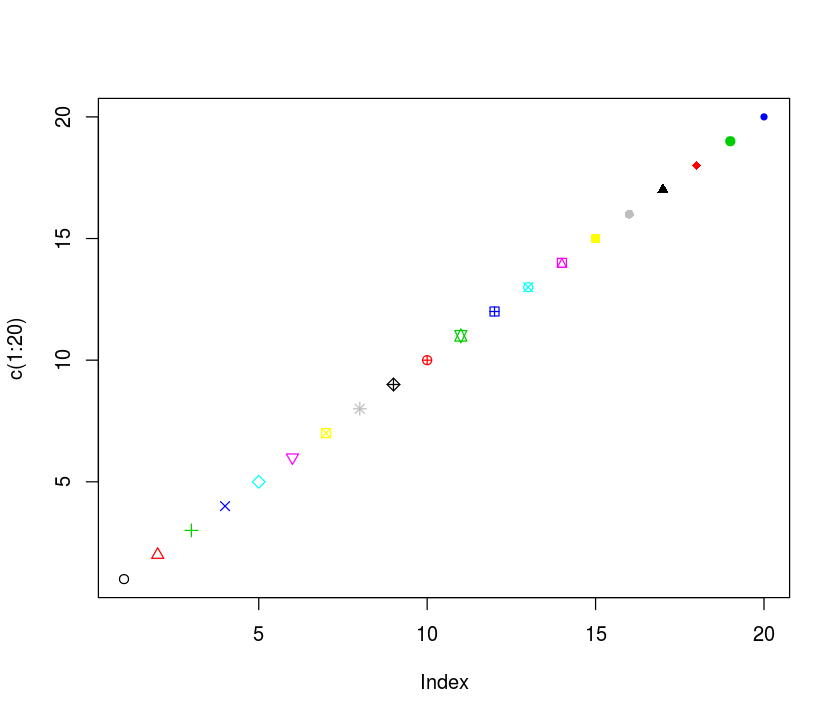

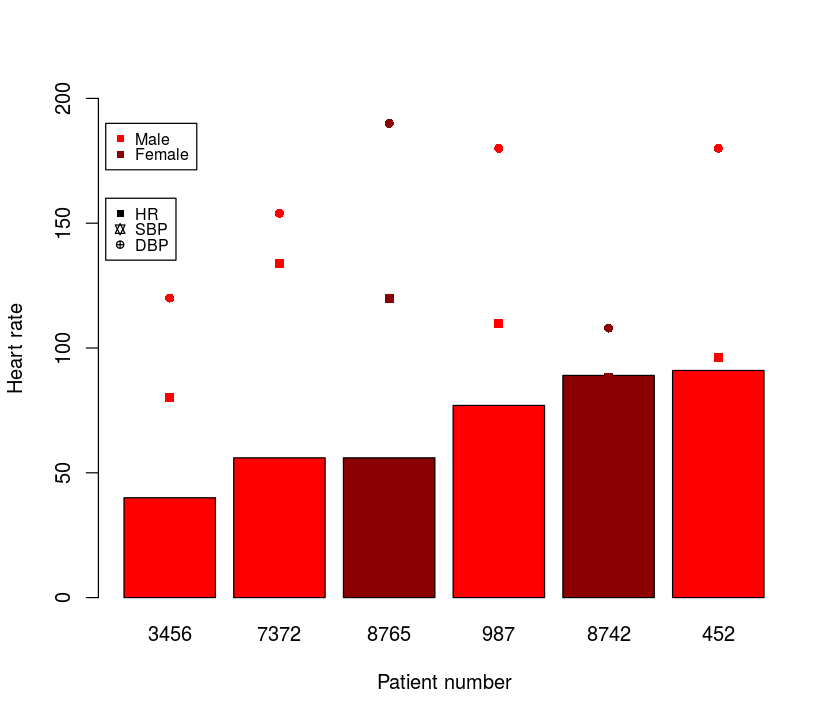

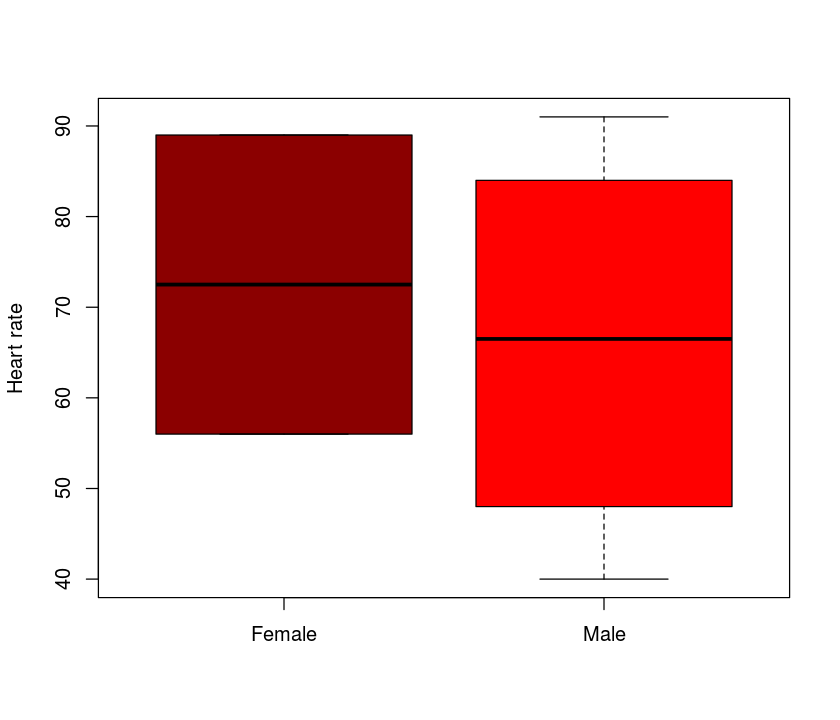

In [14]:
# First some options for the size of the plot.
options(repr.plot.width=7, repr.plot.height=6)

Pdatanew<-Pdatanew[order(Pdatanew$HR),]
Pdatanew<-na.omit(Pdatanew)

cols <- ifelse(Pdatanew$GENDER == "Male", "red","darkred")

plot(c(1:20),pch=1:20,col=1:20)


x1<-barplot(Pdatanew$HR, col=cols,ylim=c(0,200),xlab="Patient number", ylab="Heart rate",names.arg=Pdatanew$PATNO) #change the shape to triangles
points(Pdatanew$SBP~x1, col=cols, pch=15)
points(Pdatanew$DBP~x1, col=cols, pch=16)

legend(0, 190, c("Male", "Female"), col = c("red","darkred"), pch = c(15,15), cex=0.8)
legend(0, 160, c("HR", "SBP","DBP"), col = "black", pch = c(15,11,10), cex=0.8)

Pdatanew$GENDER<-as.factor(Pdatanew$GENDER)

boxplot(Pdatanew$HR~Pdatanew$GENDER,col=c("darkred","red"),ylab="Heart rate")


# That's it! 
This is the end of this introduction. For the next part, we will go to RStudio and learn to work with this R script in that. We will practice good commenting practices there, so others (or you yourself, in two months time) can reuse your data easily. 